### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную и нейронную модель для прогнозирования цен на жилье в США на основе различных факторов.



### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


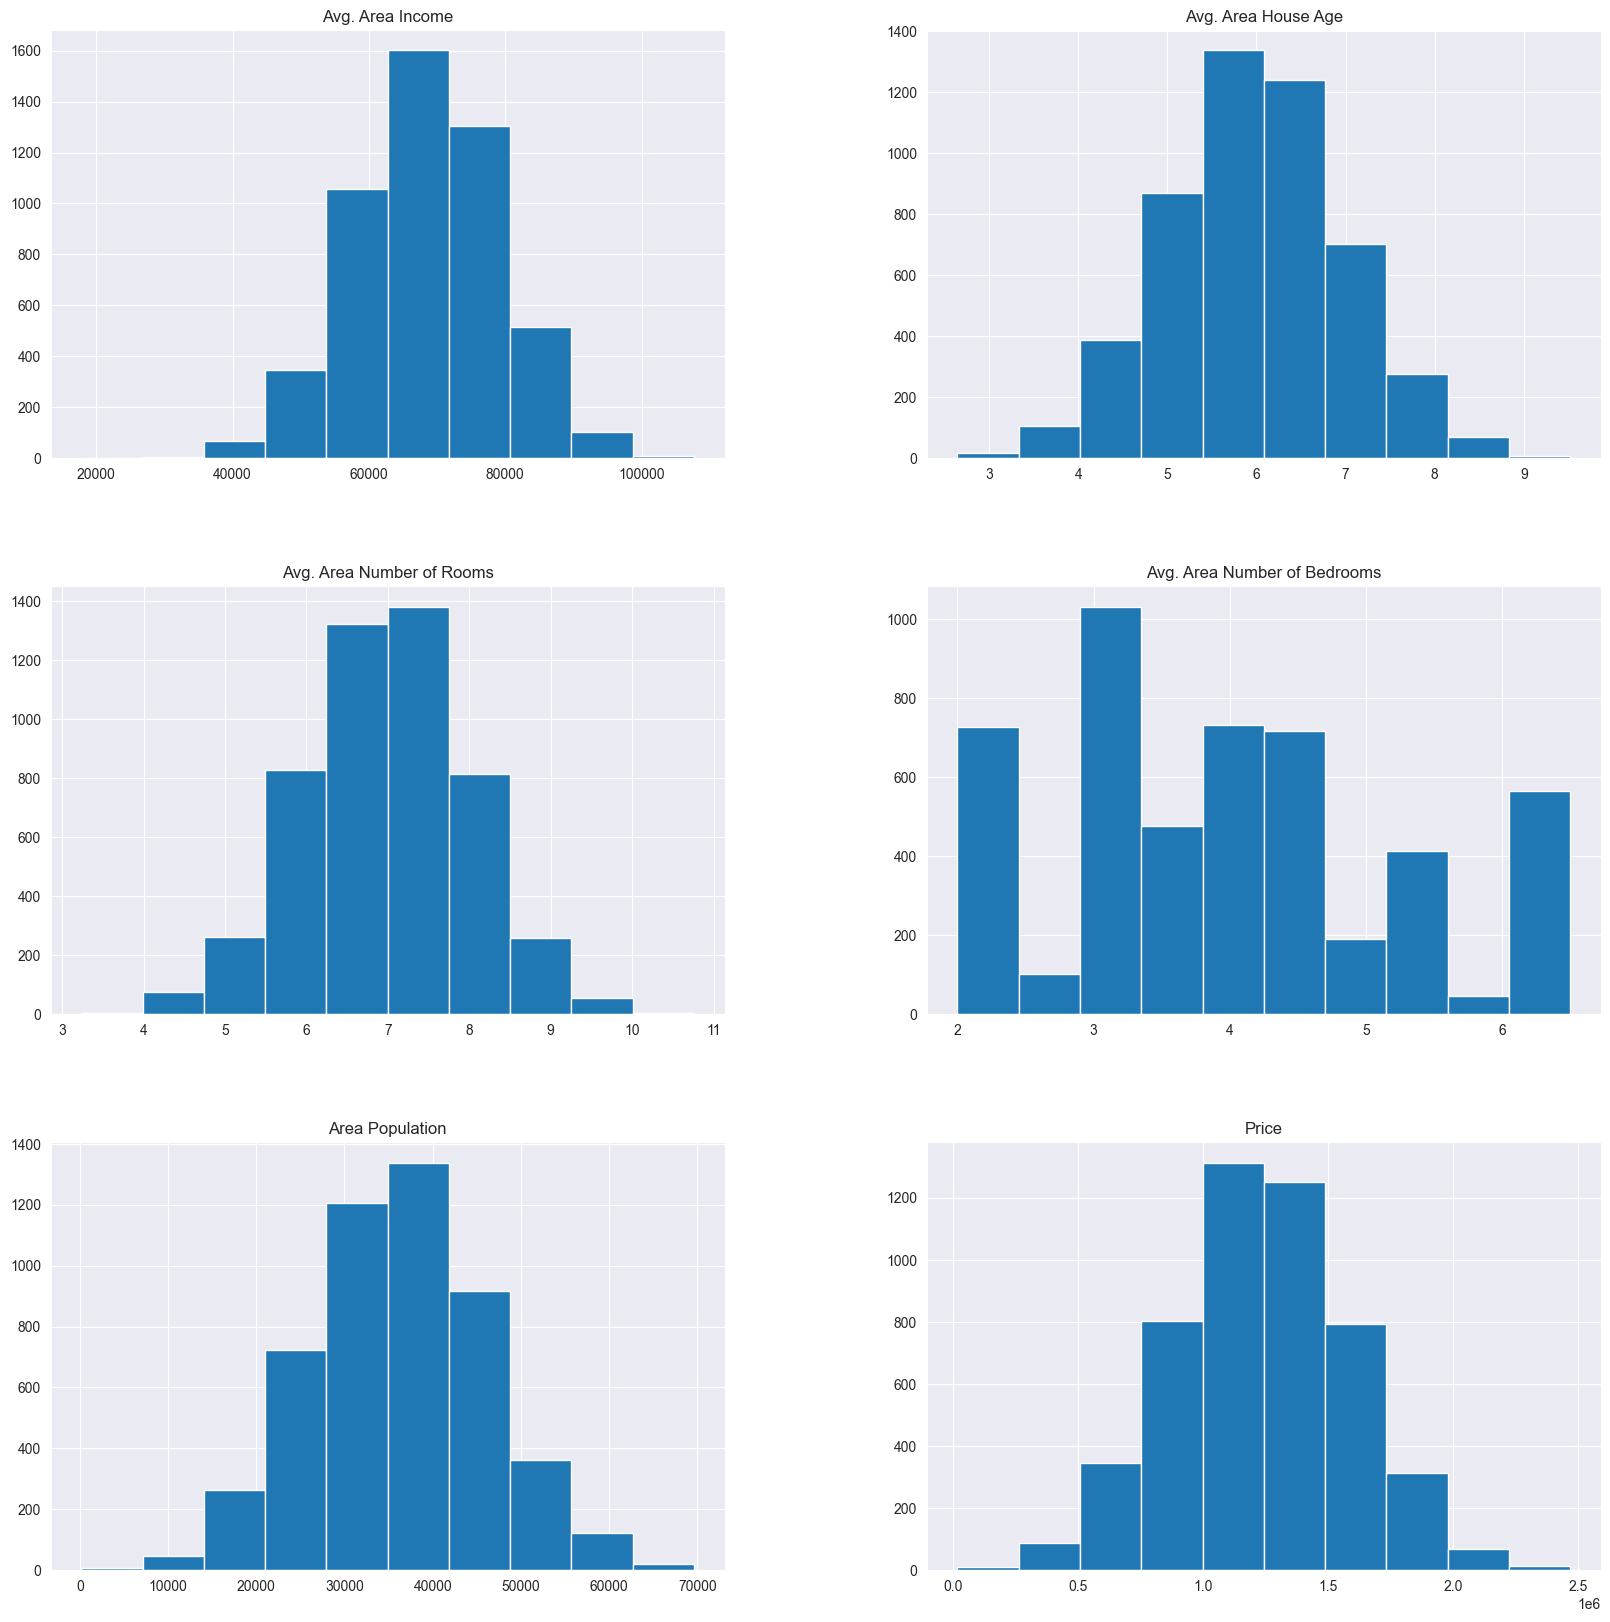

In [11]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

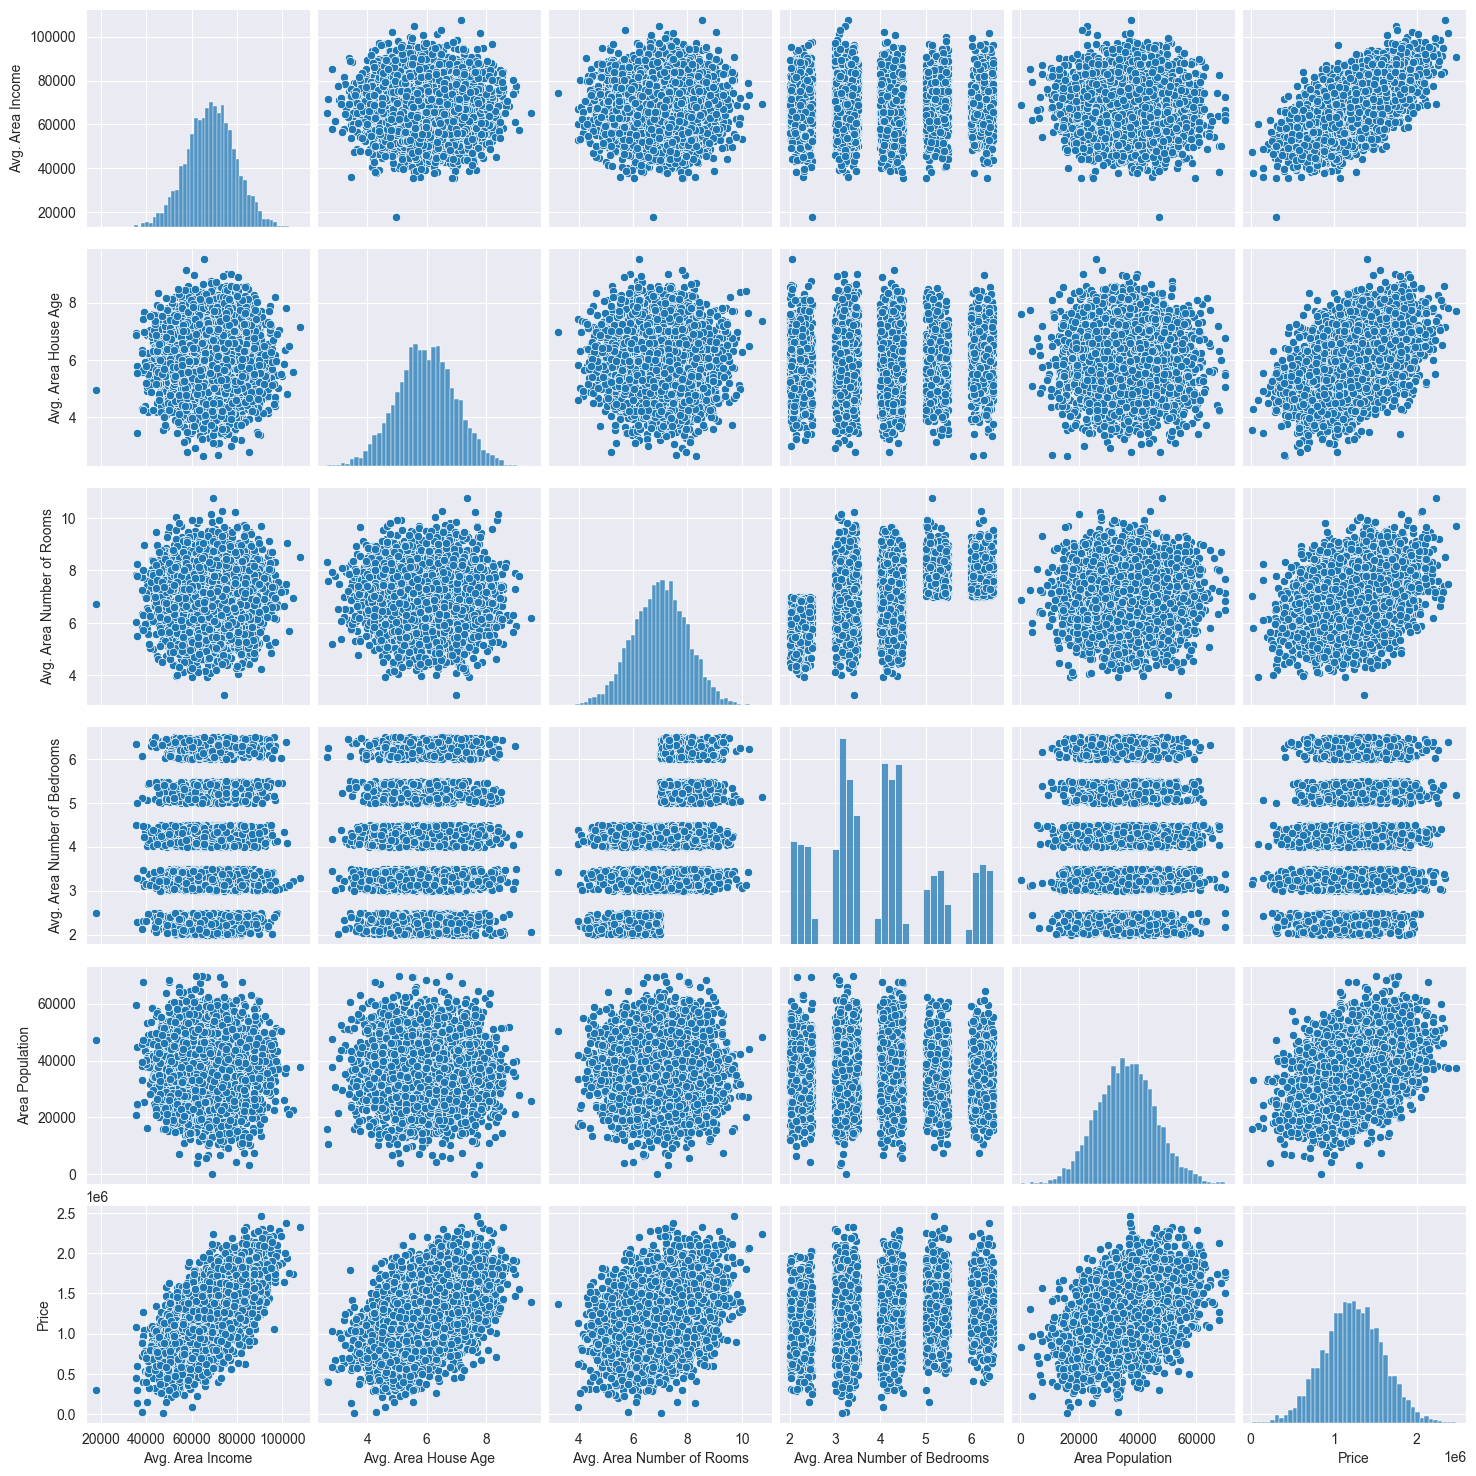

In [12]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

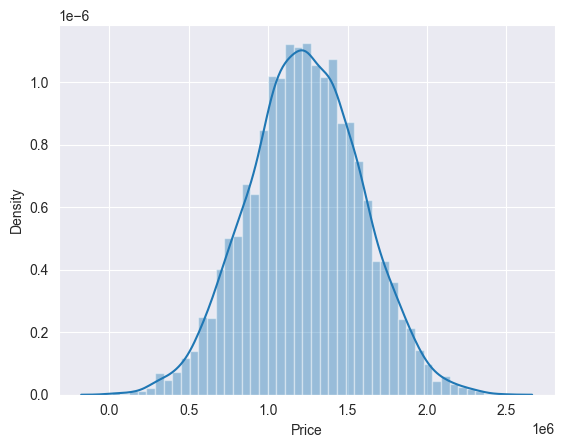

In [13]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

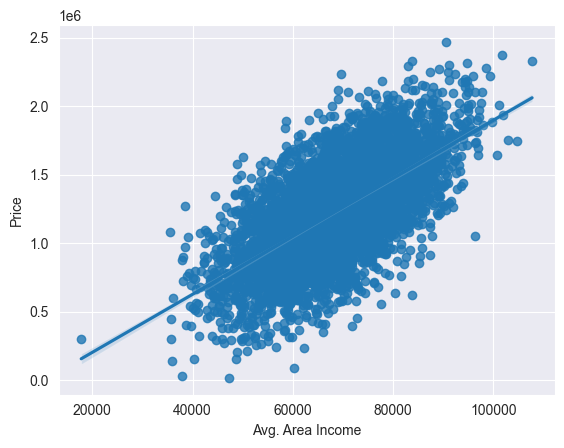

In [14]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [15]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

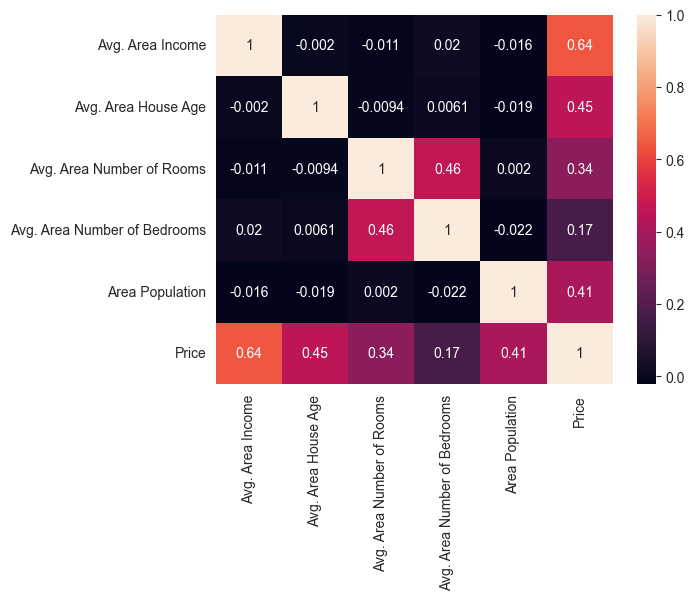

In [16]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [17]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

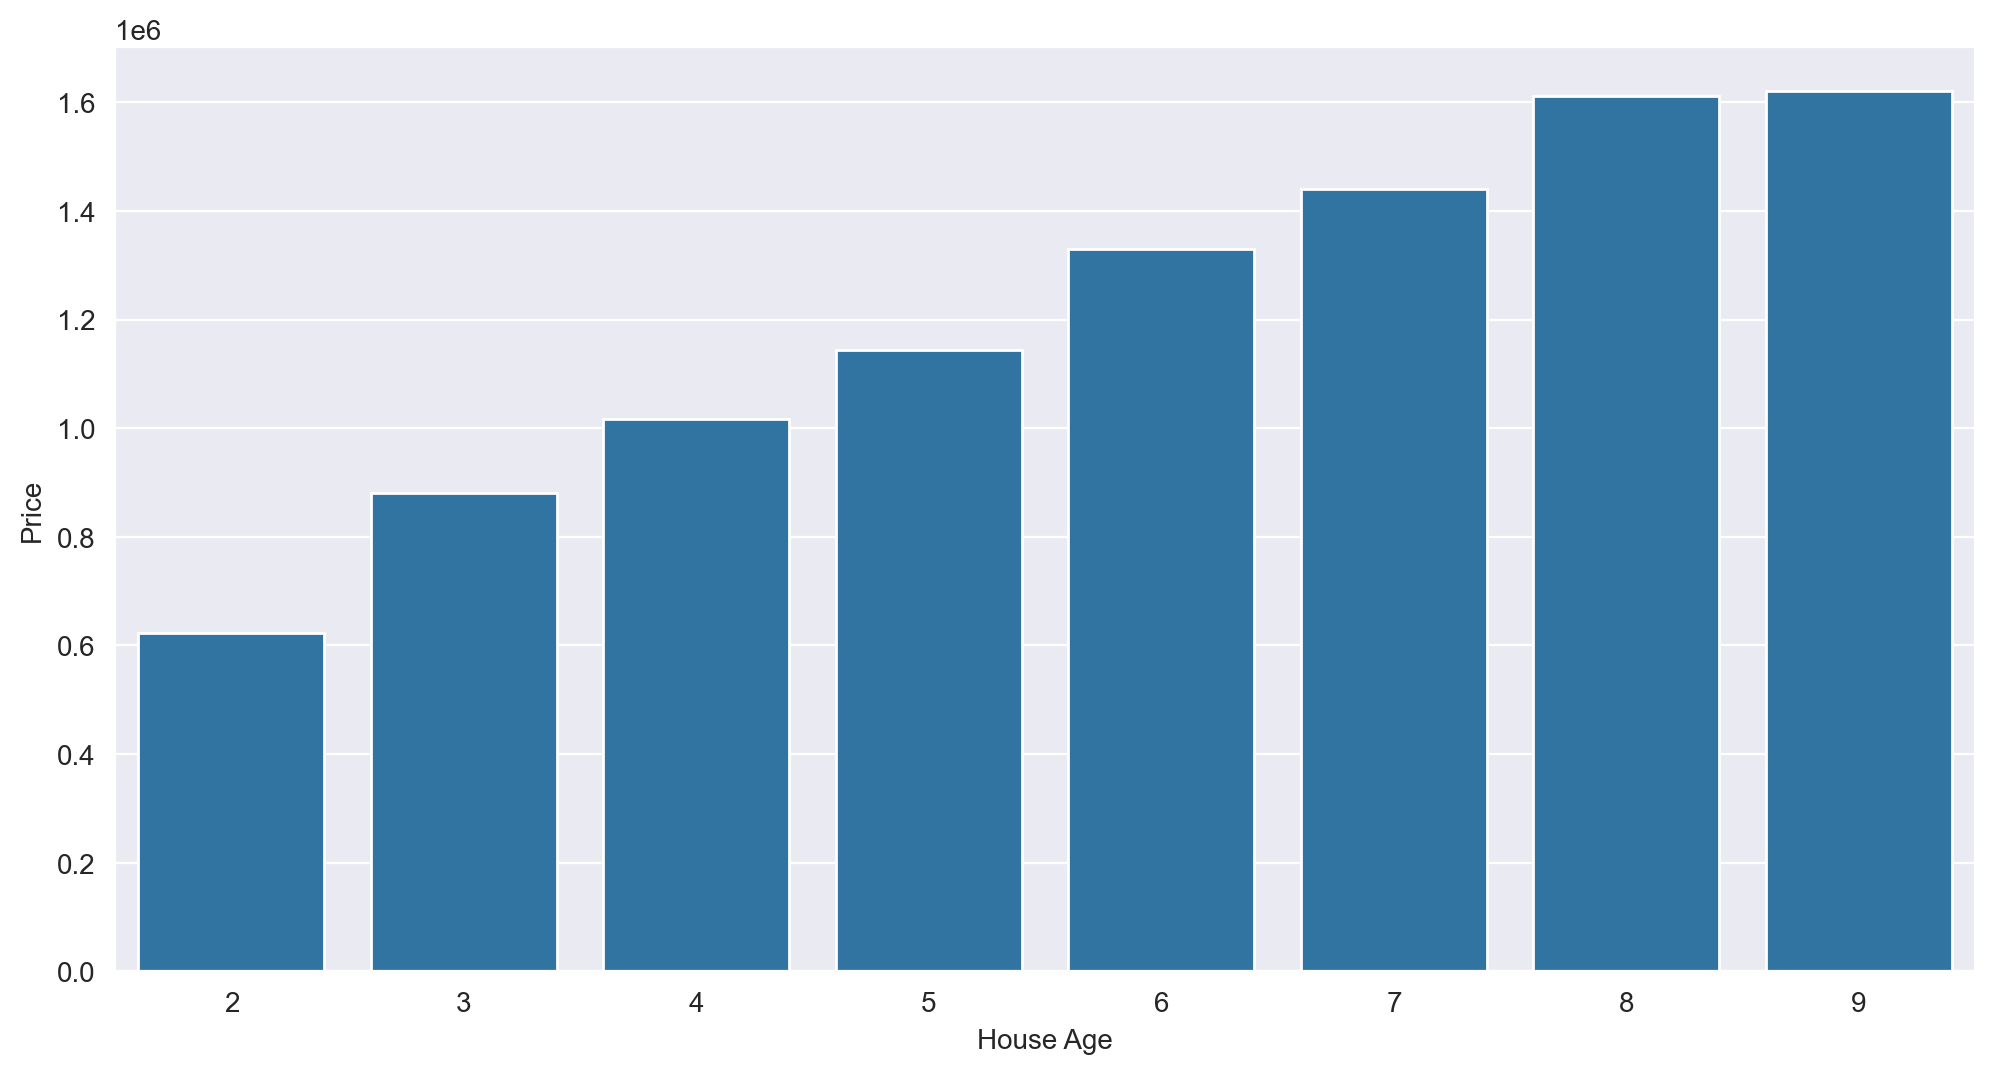

In [18]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [19]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

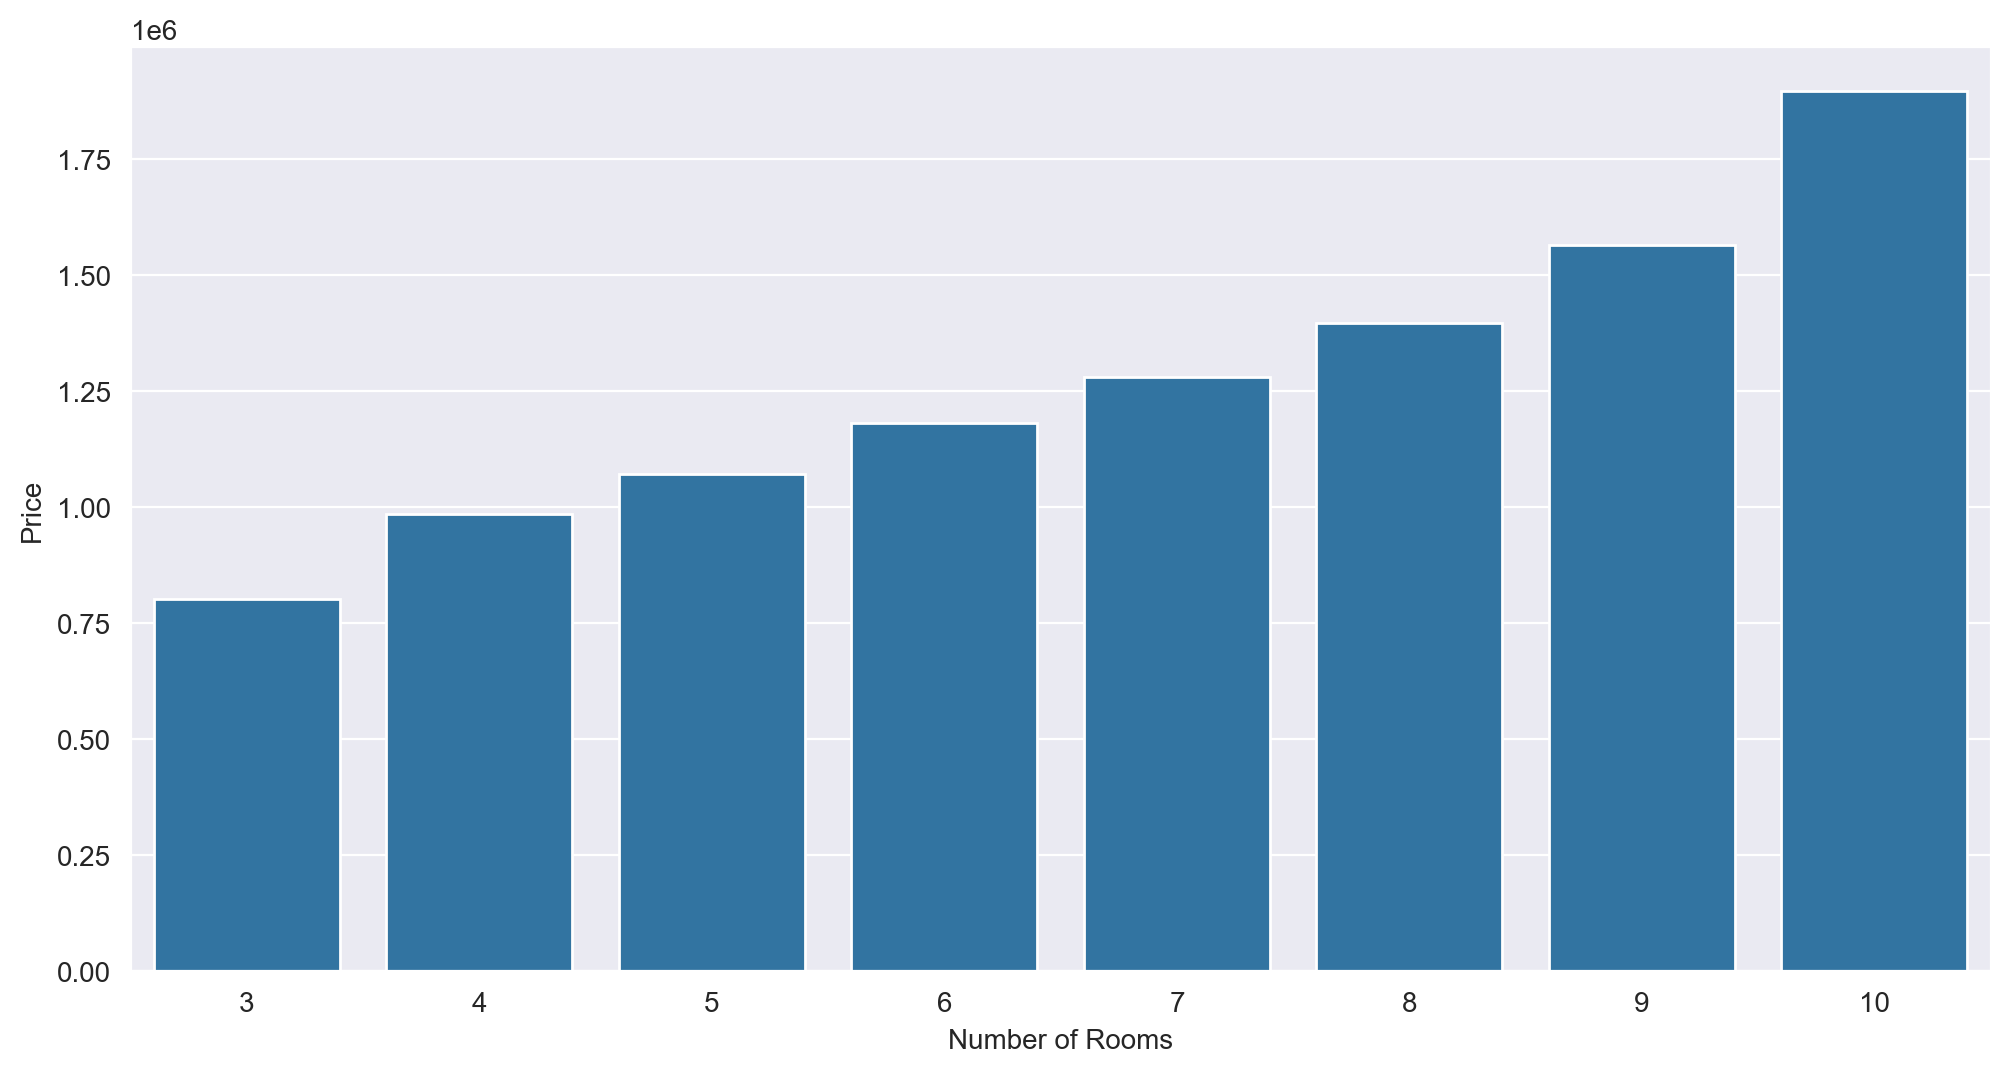

In [20]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [21]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

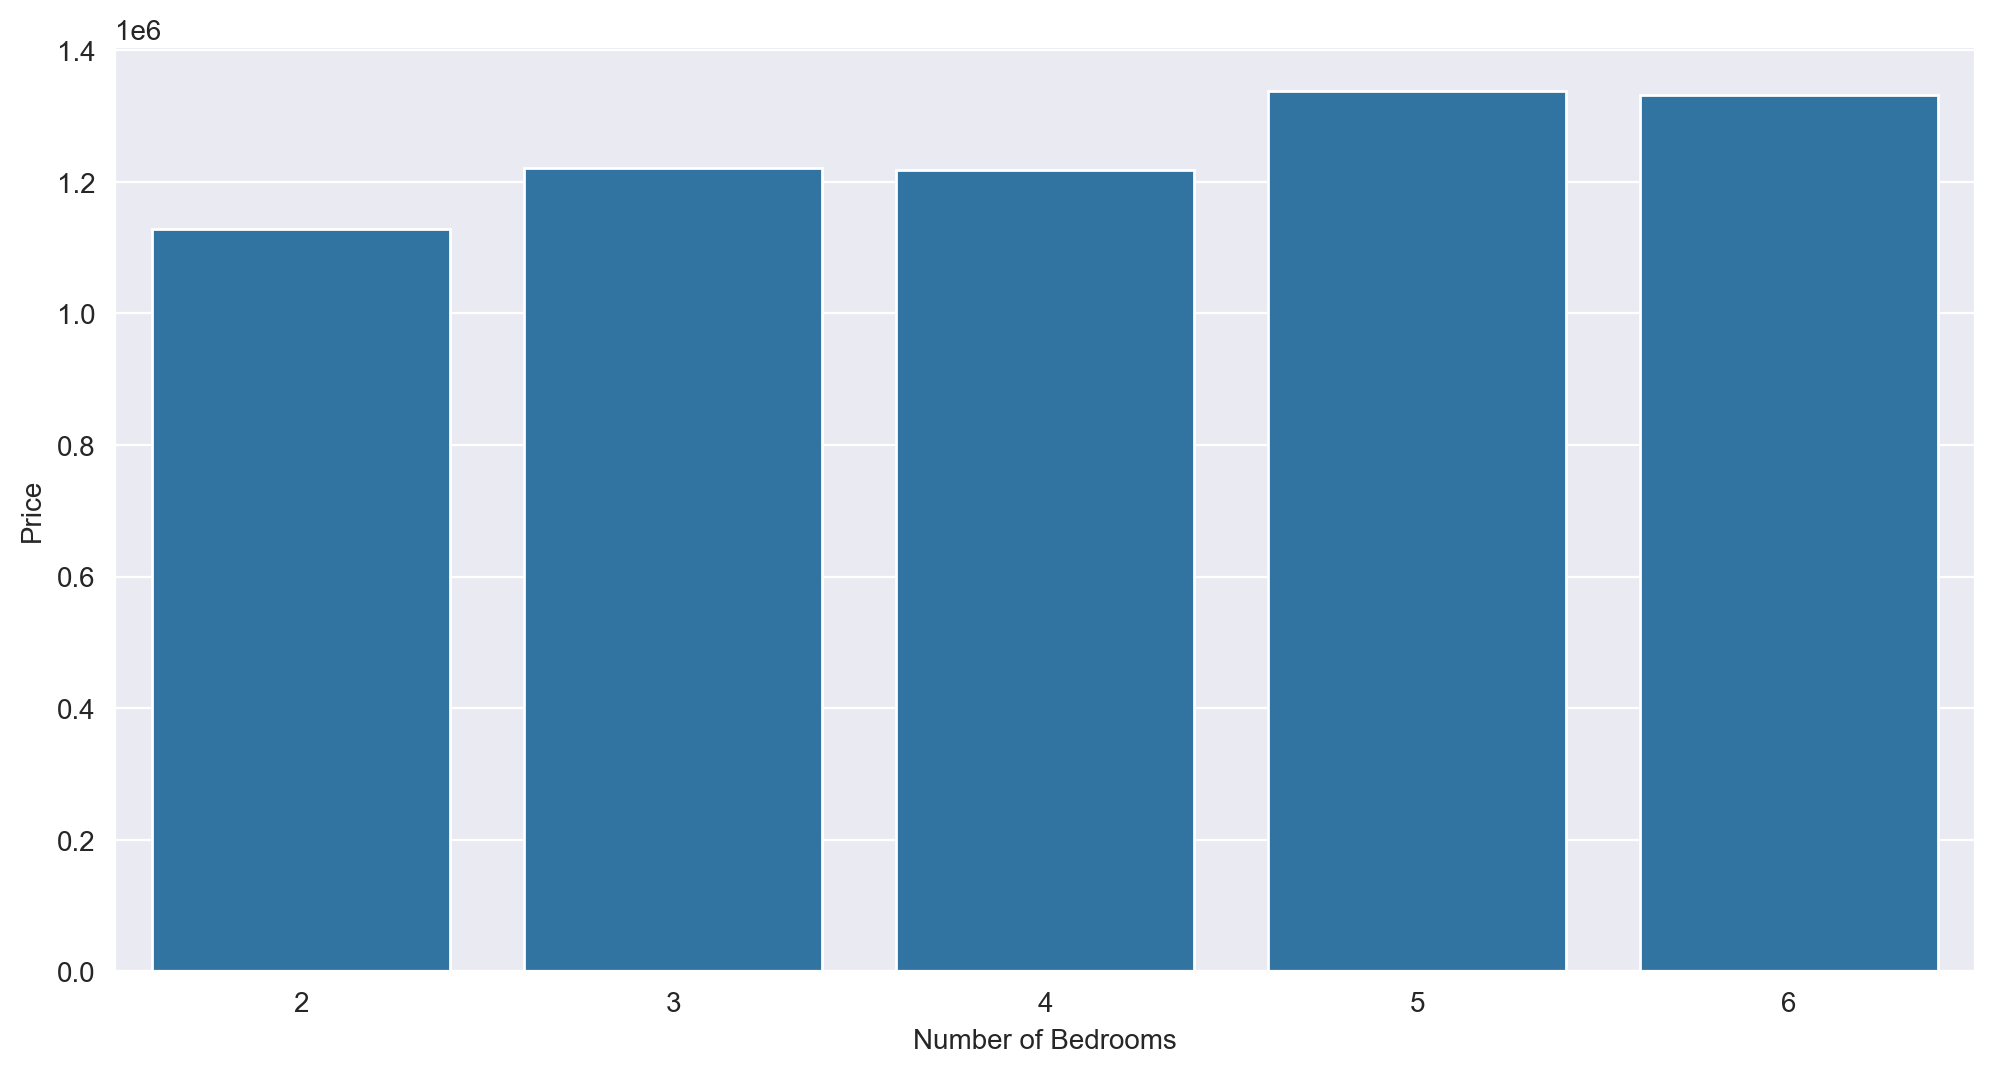

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [24]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [25]:
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
lrm.intercept_

np.float64(-2638673.4261914166)

In [31]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [32]:
predictions = lrm.predict(X_test)

In [33]:
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176],
      shape=(1500,))

In [34]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

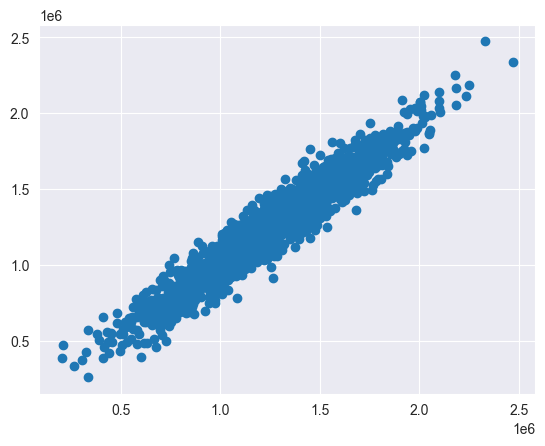

In [35]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

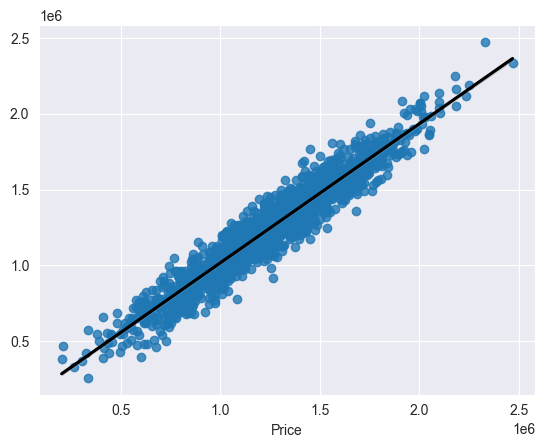

In [36]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

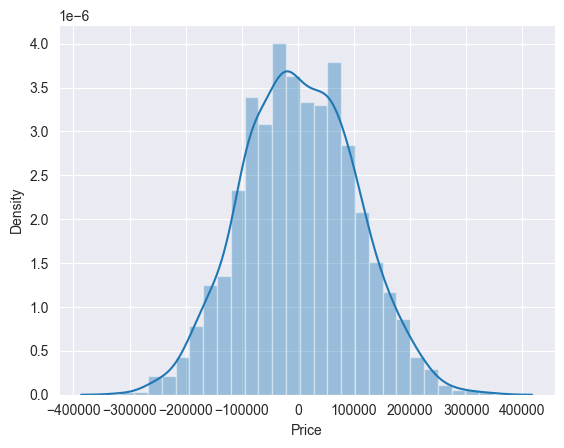

In [37]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336905

In [40]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401144

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485567)

In [42]:
metrics.r2_score(y_test, predictions)

0.9146818498753994

### Обучение модели нейросети для предсказывания цены жилья

In [43]:
# Импортируем необходимые библиотеки:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
X = df.drop(['Address', 'Price'], axis=1)

In [45]:
y = df['Price']

In [46]:
# Стандартизация данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()

In [52]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape=(8,), activation='relu', name='input'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_1'),
        tf.keras.layers.Dense(16, activation='relu', name='hidden_2'),
        tf.keras.layers.Dense(1, name='output')
    ])

In [53]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
# Обучение
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4203 - mae: 0.4801 - mse: 0.4203 - val_loss: 0.1294 - val_mae: 0.2903 - val_mse: 0.1294
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1028 - mae: 0.2567 - mse: 0.1028 - val_loss: 0.0966 - val_mae: 0.2509 - val_mse: 0.0966
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 - mae: 0.2415 - mse: 0.0901 - val_loss: 0.0975 - val_mae: 0.2517 - val_mse: 0.0975
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0878 - mae: 0.2376 - mse: 0.0878 - val_loss: 0.0956 - val_mae: 0.2487 - val_mse: 0.0956
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0855 - mae: 0.2354 - mse: 0.0855 - val_loss: 0.0957 - val_mae: 0.2487 - val_mse: 0.0957
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835 - mae: 0.2319 - mse: 0.0835 - val_loss: 0.0961 - val_mae: 0.2498 - val_mse: 0.0961
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 - mae: 0.2306 - mse: 0.0827 - val_loss: 

In [55]:
y_pred_scaled = model.predict(X_test_scaled).flatten()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [56]:
y_pred_scaled

array([ 0.14555979,  0.02326756,  0.02072638, ...,  0.6187938 ,
        0.7055977 , -0.5441861 ], shape=(1500,), dtype=float32)

In [57]:
# Обратное масштабирование цен
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

MAE: $84,996.54
RMSE: $105,679.67
R² Score: 0.9054


<Axes: >

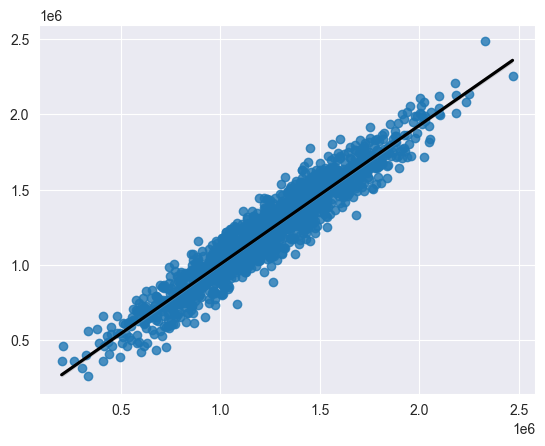

In [59]:
sns.regplot(x=y_test_original, y=y_pred, line_kws={"color":"black"})

<Axes: ylabel='Density'>

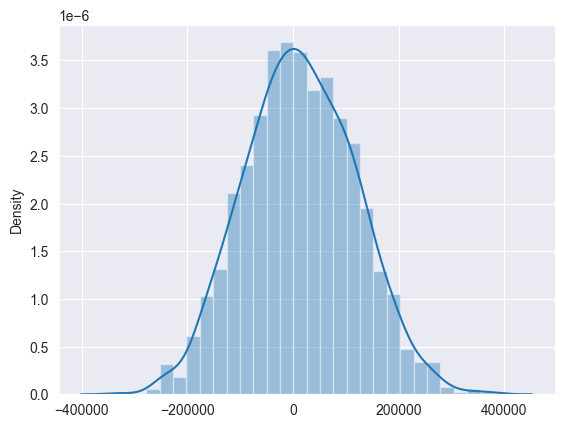

In [60]:
sns.distplot((y_test_original - y_pred))

### Сравнение моделей


In [63]:
lr_mae = mean_absolute_error(y_test, predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, predictions))
lr_r2 = r2_score(y_test, predictions)
nn_mae = mean_absolute_error(y_test, y_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
nn_r2 = r2_score(y_test, y_pred)

In [64]:
print("=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===")
print(f"MAE: ${lr_mae:,.2f}")
print(f"RMSE: ${lr_rmse:,.2f}")
print(f"R²: {lr_r2:.4f}")
print("=== НЕЙРОННАЯ СЕТЬ ===")
print(f"MAE: ${nn_mae:,.2f}")
print(f"RMSE: ${nn_rmse:,.2f}")
print(f"R²: {nn_r2:.4f}")

=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===
MAE: $81,135.57
RMSE: $100,341.53
R²: 0.9147
=== НЕЙРОННАЯ СЕТЬ ===
MAE: $84,996.54
RMSE: $105,679.67
R²: 0.9054


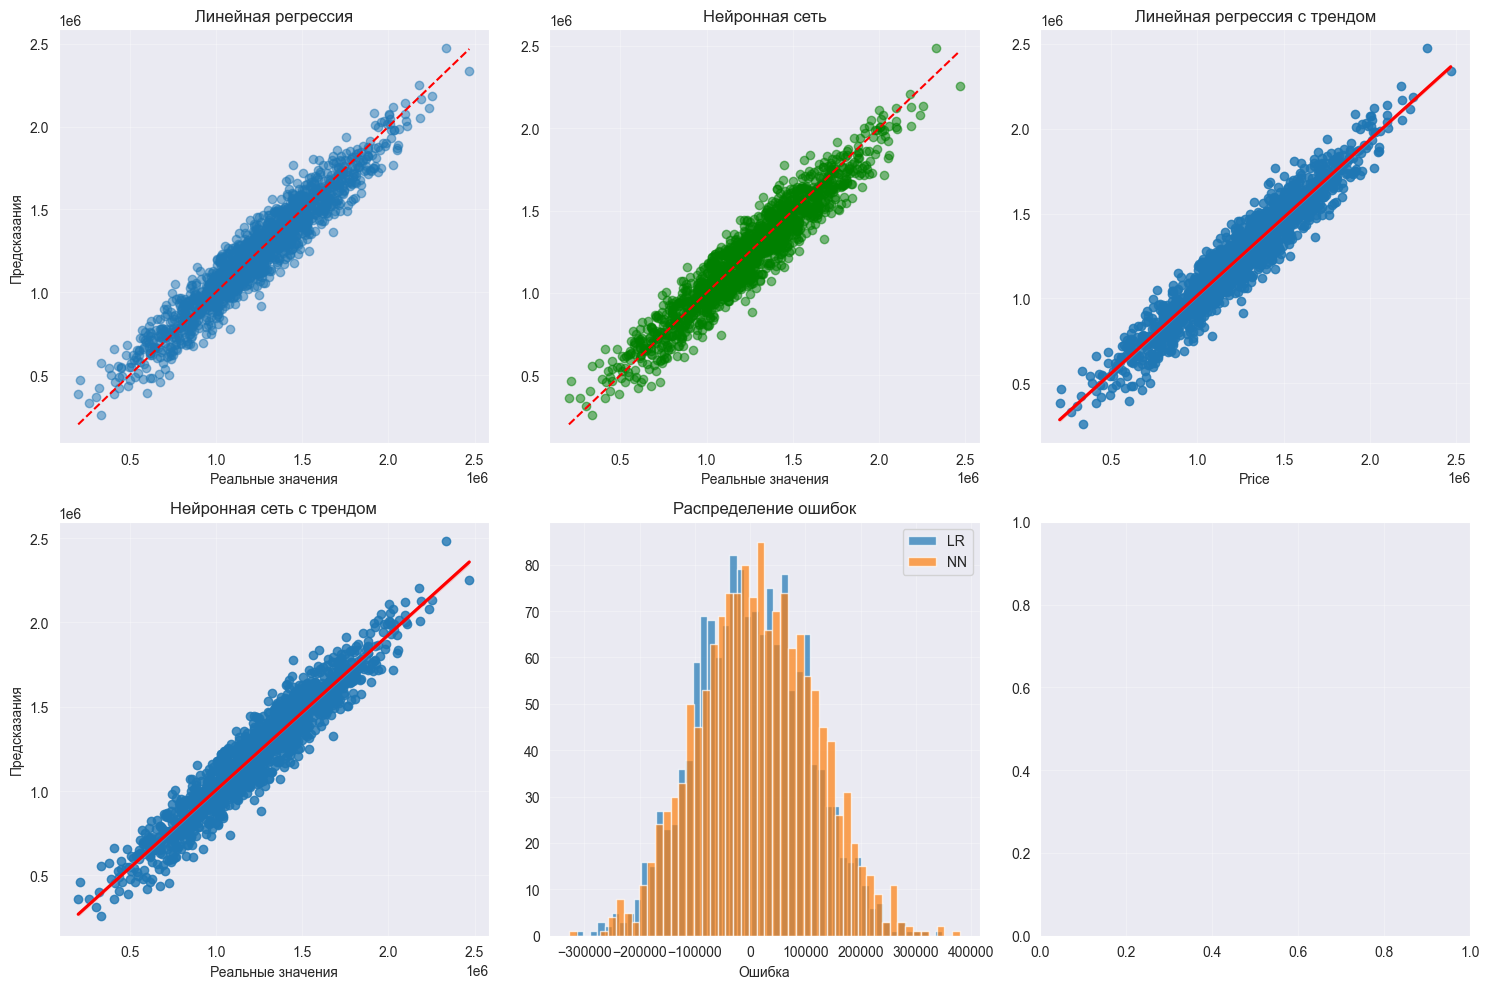

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(y_test, predictions, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 0].set_title('Линейная регрессия')
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказания')

axes[0, 1].scatter(y_test, y_pred, alpha=0.5, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 1].set_title('Нейронная сеть')
axes[0, 1].set_xlabel('Реальные значения')

sns.regplot(x=y_test, y=predictions, ax=axes[0, 2], line_kws={"color": "red"})
axes[0, 2].set_title('Линейная регрессия с трендом')

sns.regplot(x=y_test, y=y_pred, ax=axes[1, 0], line_kws={"color": "red"})
axes[1, 0].set_title('Нейронная сеть с трендом')
axes[1, 0].set_xlabel('Реальные значения')
axes[1, 0].set_ylabel('Предсказания')

axes[1, 1].hist(y_test - predictions, bins=50, alpha=0.7, label='LR')
axes[1, 1].hist(y_test - y_pred, bins=50, alpha=0.7, label='NN')
axes[1, 1].set_title('Распределение ошибок')
axes[1, 1].set_xlabel('Ошибка')
axes[1, 1].legend()

metrics_vis = pd.DataFrame({
    'Модель': ['LR', 'LR', 'LR', 'NN', 'NN', 'NN'],
    'Метрика': ['MAE', 'RMSE', 'R²', 'MAE', 'RMSE', 'R²'],
    'Значение': [lr_mae, lr_rmse, lr_r2*100000, nn_mae, nn_rmse, nn_r2*100000]
})

for i, ax in enumerate(axes.flat):
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В ходе работы была обучена модель на 4 слоях (по одной на входную и выходную и 2 скрытых). Датасет имел весьма разбросанные диапазоны данных. Самое важное: диапазон цены от 16.000 до 2.5 миллионов долларов. Данные масштабировались и былы позже отправлены в модель. За 33 эпохи модель обучилась до следующих параметров:
 * MAE (Средняя абсолютная ошибка): $84,996.54

 * RMSE (Среднеквадратическая ошибка): $105,679.67
 * R² Score: 0.9054

Для данной задачи предсказания цен на жилье линейная регрессия является оптимальным выбором. Она обеспечивает лучшую точность при минимальной сложности модели. Несмотря на масштабирование данных и использование нейронной сети с 3 скрытыми слоями, более простая модель показала себя лучше
Линейная регрессия показала лучшие результаты по всем метрикам:
 * MAE: $ 81,135.57 (меньше на $3,860.97)
 * RMSE: $ 100,341.53 (меньше на $5,338.14)
 * R2: 0.9147 (выше на 0.0093)

Выполнил: Кабанов Илья, 22П-2